In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

In [3]:
df = pd.read_csv("D:\\DSA\\pp\\car data.csv")

In [5]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None
              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       

In [6]:
df.drop(columns=['Car_Name'], inplace=True)

In [8]:
categorical_cols = ['Fuel_Type', 'Seller_Type', 'Transmission']
ohe = OneHotEncoder(drop='first', sparse_output=False)
categorical_transformed = ohe.fit_transform(df[categorical_cols])
categorical_df = pd.DataFrame(categorical_transformed, columns=ohe.get_feature_names_out(categorical_cols))

df = df.drop(columns=categorical_cols).reset_index(drop=True)
df = pd.concat([df, categorical_df], axis=1)

In [9]:
y = df['Selling_Price']
X = df.drop(columns=['Selling_Price'])

In [10]:
scaler = StandardScaler()
X[['Present_Price', 'Kms_Driven']] = scaler.fit_transform(X[['Present_Price', 'Kms_Driven']])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(X_test)


In [15]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2 Score: {r2}")

MAE: 1.2162256821296782
MSE: 3.47880397063782
RMSE: 1.8651552135513603
R^2 Score: 0.8489813024899102


In [16]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
feature_importance.sort_values(by='Coefficient', ascending=False, inplace=True)
print(feature_importance)

                  Feature  Coefficient
1           Present_Price     3.703476
4        Fuel_Type_Diesel     2.533273
5        Fuel_Type_Petrol     0.738464
0                    Year     0.353801
2              Kms_Driven    -0.239039
3                   Owner    -0.903760
6  Seller_Type_Individual    -1.190593
7     Transmission_Manual    -1.639022


In [17]:
residuals = y_test - y_pred

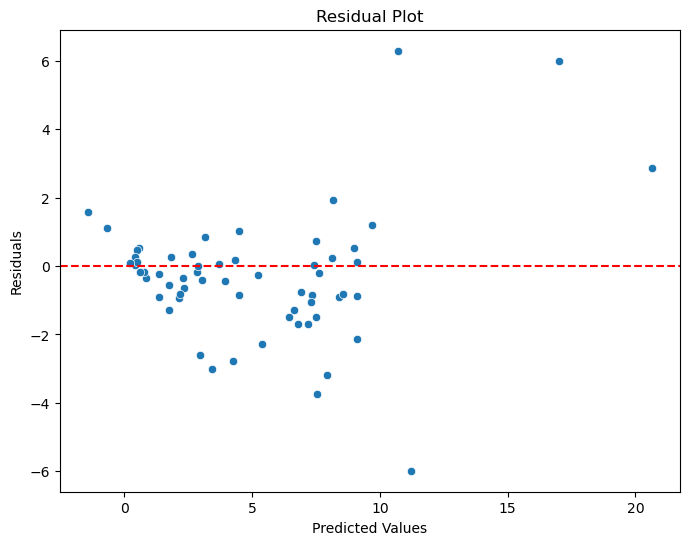

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

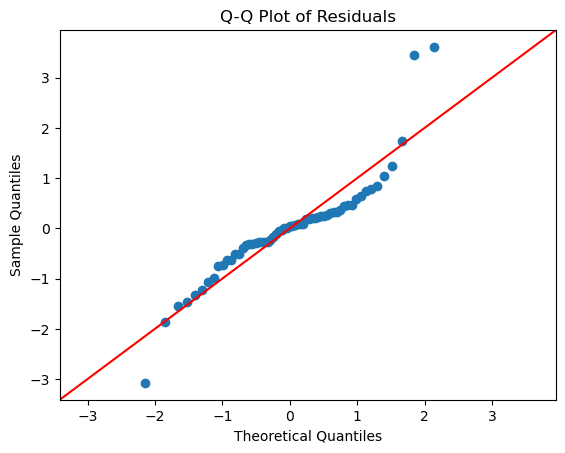

In [19]:
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()

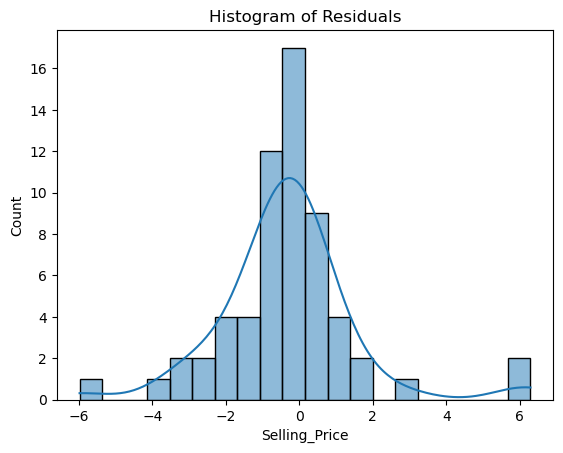

In [20]:
sns.histplot(residuals, kde=True, bins=20)
plt.title('Histogram of Residuals')
plt.show()